In [2]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

### Data load

In [65]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()
X_train = X_train[:,:,:, None]
X_test = X_test[:,:,:, None]

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Normalization

In [4]:
X_train = X_train / 256
X_test= X_test/ 256

### Cateorization

In [5]:
Y_test = to_categorical(Y_test)
Y_train = to_categorical(Y_train)

### Model save directory setting

In [6]:
save_path = './Results/'
if not os.path.exists(save_path):
    os.mkdir(save_path)

### Model definition

In [45]:
def MNISTModel ():
    InpL = Input( shape=(X_train.shape[1] , X_train.shape[2], 1))
    ConvL = Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='valid', activation='relu')(InpL)
    print(ConvL)
    ConvL = MaxPool2D(pool_size=(2,2), strides=(1, 1), padding='valid' )(ConvL)
    ConvL = Dropout(0.2)(ConvL)
    print(ConvL)
    ConvL = Conv2D(filters=64, kernel_size=(3,3), strides=(2, 2), padding='valid', activation='relu')(ConvL)
    print(ConvL)
    ConvL = MaxPool2D(pool_size=(2,2), strides=(1, 1), padding='valid' )(ConvL)
    ConvL = Dropout(0.2)(ConvL)
    print(ConvL)

    DNNL = Flatten()(ConvL)
    print(DNNL)

    DNNL = Dense(200, activation='relu')(DNNL)
    DNNL = Dense(100, activation='relu')(DNNL)
    Output = Dense(10, activation='softmax')(DNNL)

    return Model(InpL,Output)   
    

In [47]:
### Model checkpoint
ModelSaveSameName = save_path+'MNISTM.hdf5'
ModelSave = ModelCheckpoint(filepath=ModelSaveSameName, monitor='val_loss', verbose=1, save_best_only=True)

### Model Early stop
EarlyStop = EarlyStopping(monitor='val_loss', patience=30)

MNISTM = MNISTModel()
MNISTM.compile(loss=tf.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
MNISTHist = MNISTM.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=200, batch_size=300,  verbose=1, callbacks=[ModelSave, EarlyStop])

KerasTensor(type_spec=TensorSpec(shape=(None, 26, 26, 32), dtype=tf.float32, name=None), name='conv2d_51/Relu:0', description="created by layer 'conv2d_51'")
KerasTensor(type_spec=TensorSpec(shape=(None, 25, 25, 32), dtype=tf.float32, name=None), name='dropout_21/Identity:0', description="created by layer 'dropout_21'")
KerasTensor(type_spec=TensorSpec(shape=(None, 12, 12, 64), dtype=tf.float32, name=None), name='conv2d_52/Relu:0', description="created by layer 'conv2d_52'")
KerasTensor(type_spec=TensorSpec(shape=(None, 11, 11, 64), dtype=tf.float32, name=None), name='dropout_22/Identity:0', description="created by layer 'dropout_22'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7744), dtype=tf.float32, name=None), name='flatten_9/Reshape:0', description="created by layer 'flatten_9'")
Epoch 1/200
200/200 [==============================] - 7s 12ms/step - loss: 0.5227 - accuracy: 0.8314 - val_loss: 0.0582 - val_accuracy: 0.9821

Epoch 00001: val_loss improved from inf to 0.05819, savi

### Model weight load and evaluate it

In [49]:
MNISTM = MNISTModel()
MNISTM.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])
print('Before loading weights')
print(MNISTM.evaluate(X_test,Y_test, batch_size=300 ))
print()

MNISTM.load_weights(ModelSaveSameName)
print('After loading weights')
print(MNISTM.evaluate(X_test,Y_test, batch_size=300))

KerasTensor(type_spec=TensorSpec(shape=(None, 26, 26, 32), dtype=tf.float32, name=None), name='conv2d_55/Relu:0', description="created by layer 'conv2d_55'")
KerasTensor(type_spec=TensorSpec(shape=(None, 25, 25, 32), dtype=tf.float32, name=None), name='dropout_25/Identity:0', description="created by layer 'dropout_25'")
KerasTensor(type_spec=TensorSpec(shape=(None, 12, 12, 64), dtype=tf.float32, name=None), name='conv2d_56/Relu:0', description="created by layer 'conv2d_56'")
KerasTensor(type_spec=TensorSpec(shape=(None, 11, 11, 64), dtype=tf.float32, name=None), name='dropout_26/Identity:0', description="created by layer 'dropout_26'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7744), dtype=tf.float32, name=None), name='flatten_11/Reshape:0', description="created by layer 'flatten_11'")
Before loading weights
34/34 [==============================] - 1s 12ms/step - loss: 0.6985 - accuracy: 0.0860
[0.6985511779785156, 0.0892999991774559]

After loading weights
34/34 [=================

### Plot loss graphs

Text(0, 0.5, 'loss')

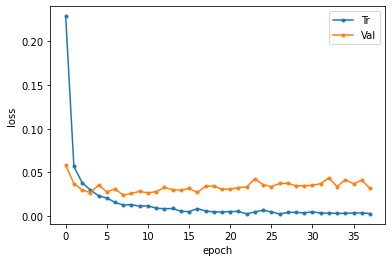

In [50]:
plt.plot(MNISTHist.history['loss'], label='Tr', marker='.')
plt.plot(MNISTHist.history['val_loss'], label='Val', marker='.')
plt.legend() 
plt.xlabel('epoch')
plt.ylabel('loss')

### Prediction example

In [54]:
Pred = MNISTM.predict(X_test, batch_size=300 )